In [1]:
# Gerekli kütüphaneleri yükleyin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setlerini yükleyelim
file_path_1 = "1- mental-illnesses-prevalence.csv"
file_path_2 = "2- burden-disease-from-each-mental-illness(1).csv"
file_path_3 = "3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv"

data1 = pd.read_csv(file_path_1)
data2 = pd.read_csv(file_path_2)
data3 = pd.read_csv(file_path_3)

# Veri setlerinin sütun adlarını ve özet bilgilerini kontrol edelim
print("Data1 Columns:", data1.columns)
print("Data2 Columns:", data2.columns)
print("Data3 Columns:", data3.columns)


Data1 Columns: Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')
Data2 Columns: Index(['Entity', 'Code', 'Year',
       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders',
       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia',
       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder',
       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders',
       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders'],
      dtype='ob

In [2]:
# Sütun adlarını küçük harfe çevirip düzenleyelim
data1.columns = data1.columns.str.strip().str.lower().str.replace(" ", "_")
data2.columns = data2.columns.str.strip().str.lower().str.replace(" ", "_")
data3.columns = data3.columns.str.strip().str.lower().str.replace(" ", "_")

# Temizlenmiş sütun adlarını kontrol edelim
print("Cleaned Data1 Columns:", data1.columns)
print("Cleaned Data2 Columns:", data2.columns)
print("Cleaned Data3 Columns:", data3.columns)


Cleaned Data1 Columns: Index(['entity', 'code', 'year',
       'schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
       'depressive_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
       'anxiety_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
       'bipolar_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
       'eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized'],
      dtype='object')
Cleaned Data2 Columns: Index(['entity', 'code', 'year',
       'dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders',
       'dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_schizophrenia',
       'dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_bipolar_disorder',
       'dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_eating_disorders',
       'dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_anxiety_disorders'],

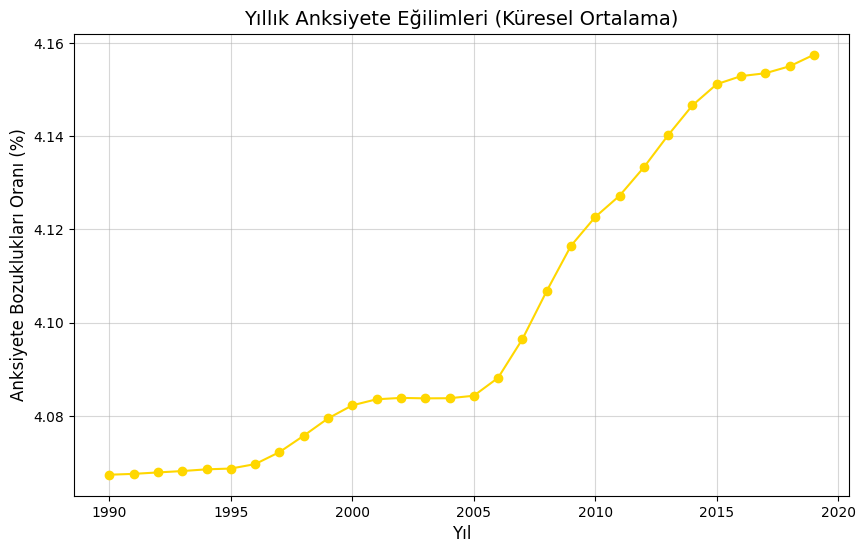

In [3]:
# Anksiyete bozukluklarının yıllık ortalamasını hesaplayalım
anxiety_data = data1.groupby("year")[
    "anxiety_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized"
].mean()

# Yıllık trendleri görselleştirelim
plt.figure(figsize=(10, 6))
anxiety_data.plot(kind="line", marker="o", color="gold")
plt.title("Yıllık Anksiyete Eğilimleri (Küresel Ortalama)", fontsize=14)
plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Anksiyete Bozuklukları Oranı (%)", fontsize=12)
plt.grid(alpha=0.5)
plt.show()


/var/folders/v3/p30r3kw502zc4g5s4k8j6td40000gn/T/ipykernel_8932/910200926.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=burden_mean_renamed.index, y=burden_mean_renamed.values, palette="muted")


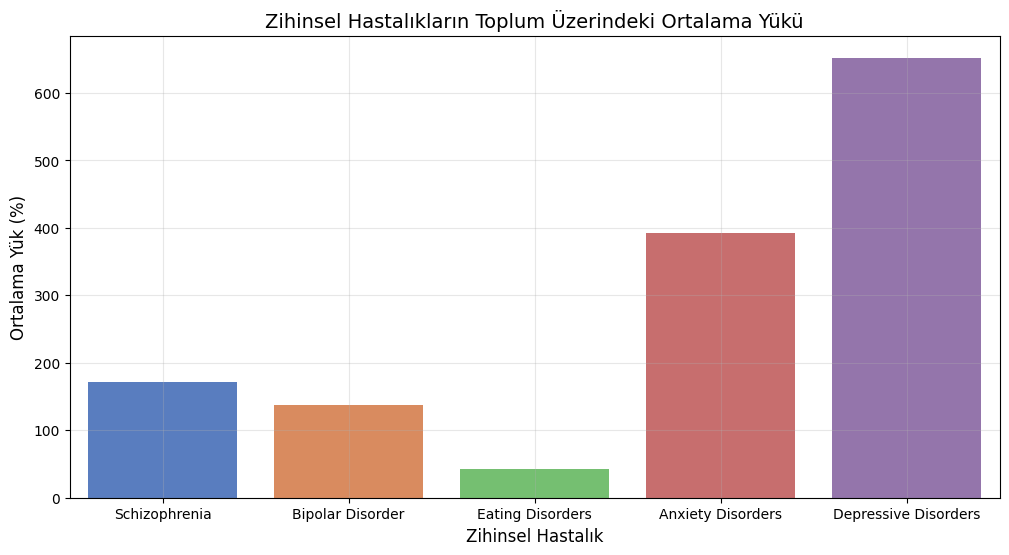

In [5]:
# Sütun adlarını okunabilir hale getirmek için bir sözlük oluştur
column_rename_map = {
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_schizophrenia": "Schizophrenia",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_bipolar_disorder": "Bipolar Disorder",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_eating_disorders": "Eating Disorders",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_anxiety_disorders": "Anxiety Disorders",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders": "Depressive Disorders"
}

# Sütun adlarını yeniden adlandır
burden_mean_renamed = burden_mean.rename(index=column_rename_map)

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=burden_mean_renamed.index, y=burden_mean_renamed.values, palette="muted")
plt.title("Zihinsel Hastalıkların Toplum Üzerindeki Ortalama Yükü", fontsize=14)
plt.xlabel("Zihinsel Hastalık", fontsize=12)
plt.ylabel("Ortalama Yük (%)", fontsize=12)
plt.xticks(rotation=0)  # Etiketleri yatay olarak göster
plt.grid(alpha=0.3)
plt.show()


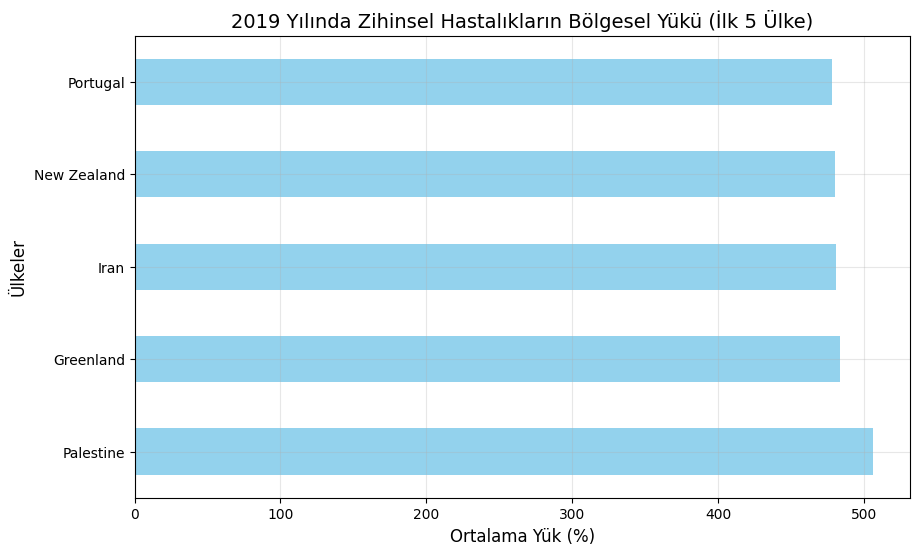

In [7]:
# Belirli bir yıl için bölgesel analiz (örneğin, 2019)
selected_year = 2019
regional_burden = data2[data2["year"] == selected_year][[
    "entity",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_schizophrenia",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_bipolar_disorder",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_anxiety_disorders",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders",
]].set_index("entity")

# İlk 5 ülkeyi seçelim
top_regions = regional_burden.mean(axis=1).nlargest(5)

# Görselleştirme
plt.figure(figsize=(10, 6))
top_regions.plot(kind="barh", color="skyblue", alpha=0.9)
plt.title("2019 Yılında Zihinsel Hastalıkların Bölgesel Yükü (İlk 5 Ülke)", fontsize=14)
plt.xlabel("Ortalama Yük (%)", fontsize=12)
plt.ylabel("Ülkeler", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


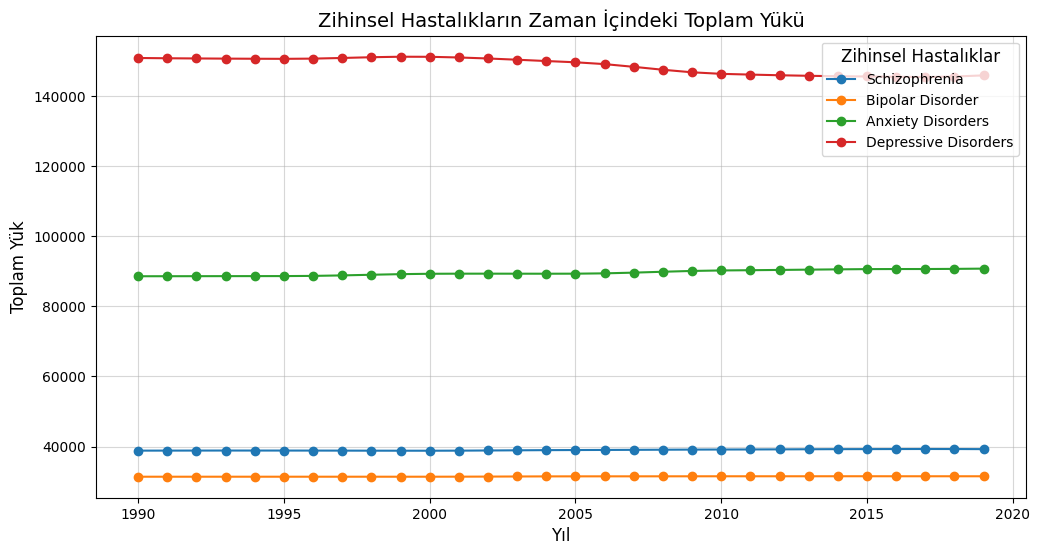

In [12]:
# Sütun adlarını okunabilir hale getirmek için bir sözlük oluştur
column_rename_map = {
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_schizophrenia": "Schizophrenia",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_bipolar_disorder": "Bipolar Disorder",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_anxiety_disorders": "Anxiety Disorders",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders": "Depressive Disorders",
}

# Zihinsel hastalıkların zaman içindeki toplam yükünü yeniden adlandırarak hesaplayalım
total_burden_by_year = data2.groupby("year")[list(column_rename_map.keys())].sum()
total_burden_by_year.rename(columns=column_rename_map, inplace=True)

# Çizgi grafiği
plt.figure(figsize=(12, 6))
for column in total_burden_by_year.columns:
    plt.plot(
        total_burden_by_year.index,
        total_burden_by_year[column],
        marker="o",
        label=column,
    )

plt.title("Zihinsel Hastalıkların Zaman İçindeki Toplam Yükü", fontsize=14)
plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Toplam Yük", fontsize=12)
plt.legend(title="Zihinsel Hastalıklar", fontsize=10, title_fontsize=12)
plt.grid(alpha=0.5)
plt.show()


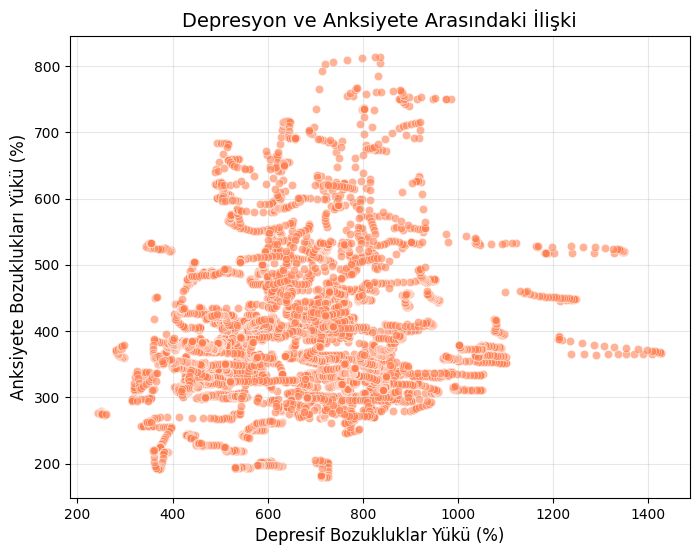

In [9]:
# Depresyon ve anksiyete arasındaki ilişkiyi inceleyelim
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data2["dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders"],
    y=data2["dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_anxiety_disorders"],
    alpha=0.6,
    color="coral",
)
plt.title("Depresyon ve Anksiyete Arasındaki İlişki", fontsize=14)
plt.xlabel("Depresif Bozukluklar Yükü (%)", fontsize=12)
plt.ylabel("Anksiyete Bozuklukları Yükü (%)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


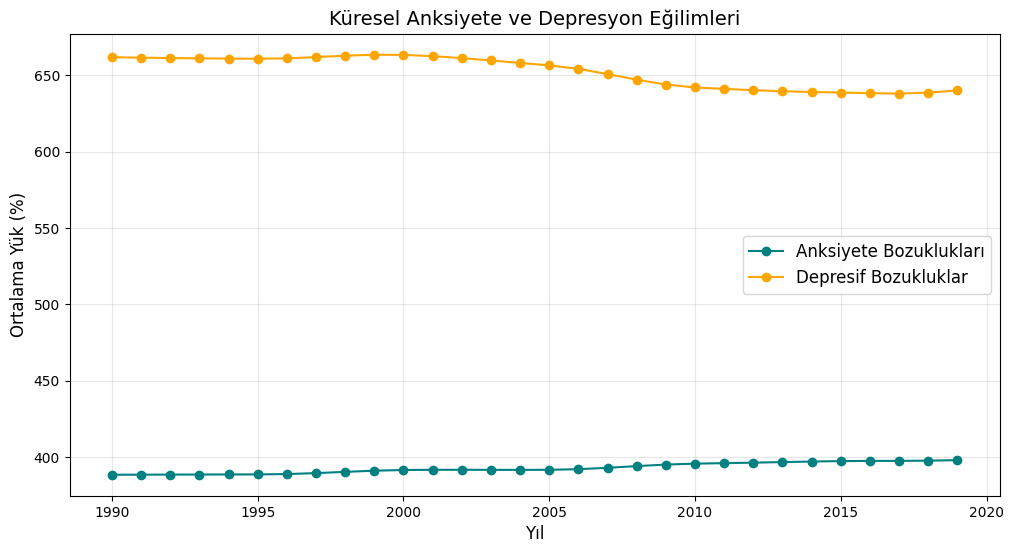

In [13]:
# Yıllara göre anksiyete ve depresyon oranlarının küresel ortalaması
anxiety_global = data2.groupby("year")["dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_anxiety_disorders"].mean()
depression_global = data2.groupby("year")["dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders"].mean()

# Çizgi grafiği
plt.figure(figsize=(12, 6))
plt.plot(anxiety_global, label="Anksiyete Bozuklukları", marker="o", color="teal")
plt.plot(depression_global, label="Depresif Bozukluklar", marker="o", color="orange")
plt.title("Küresel Anksiyete ve Depresyon Eğilimleri", fontsize=14)
plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Ortalama Yük (%)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


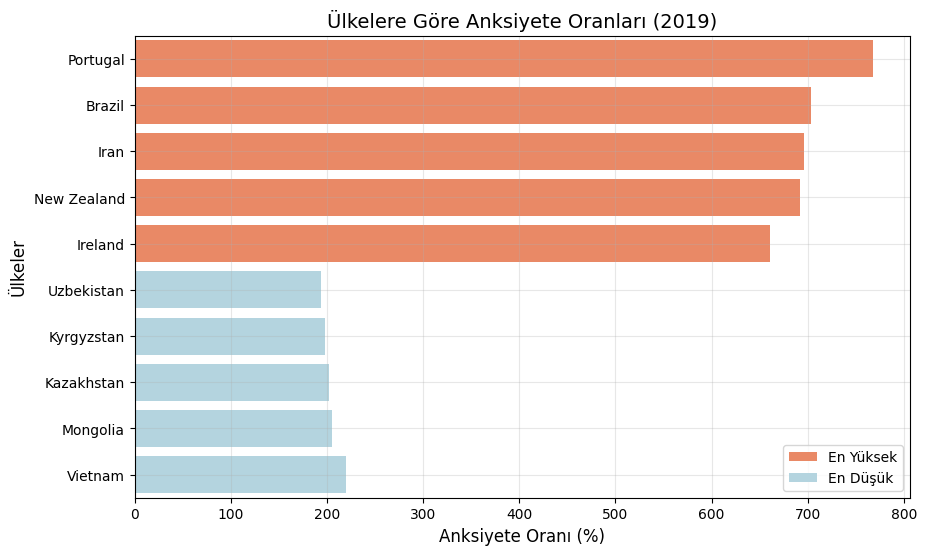

In [15]:
# Belirli bir yıl için anksiyete oranları (örneğin, 2019)
selected_year = 2019
anxiety_by_country = data2[data2["year"] == selected_year].groupby("entity")[
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_anxiety_disorders"
].mean()

# En yüksek ve en düşük oranlı ülkeleri belirleyelim
top_anxiety = anxiety_by_country.nlargest(5)
low_anxiety = anxiety_by_country.nsmallest(5)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(y=top_anxiety.index, x=top_anxiety.values, color="coral", label="En Yüksek")
sns.barplot(y=low_anxiety.index, x=low_anxiety.values, color="lightblue", label="En Düşük")
plt.title("Ülkelere Göre Anksiyete Oranları (2019)", fontsize=14)
plt.xlabel("Anksiyete Oranı (%)", fontsize=12)
plt.ylabel("Ülkeler", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


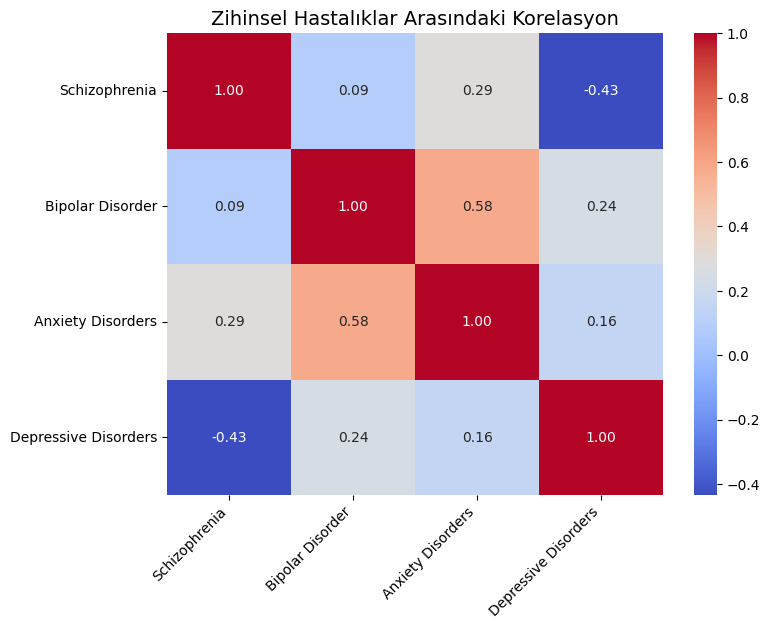

In [18]:
# Sütun adlarını okunabilir hale getirmek için bir sözlük oluştur
column_rename_map = {
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_schizophrenia": "Schizophrenia",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_bipolar_disorder": "Bipolar Disorder",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_anxiety_disorders": "Anxiety Disorders",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders": "Depressive Disorders",
}

# Sütun adlarını yeniden adlandırarak korelasyon matrisini oluştur
renamed_data = data2.rename(columns=column_rename_map)
correlation_matrix = renamed_data[list(column_rename_map.values())].corr()

# Isı haritasını oluştur
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Zihinsel Hastalıklar Arasındaki Korelasyon", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)  # X eksenindeki etiketleri döndür
plt.yticks(rotation=0, fontsize=10)  # Y eksenindeki etiketleri düz göster
plt.show()


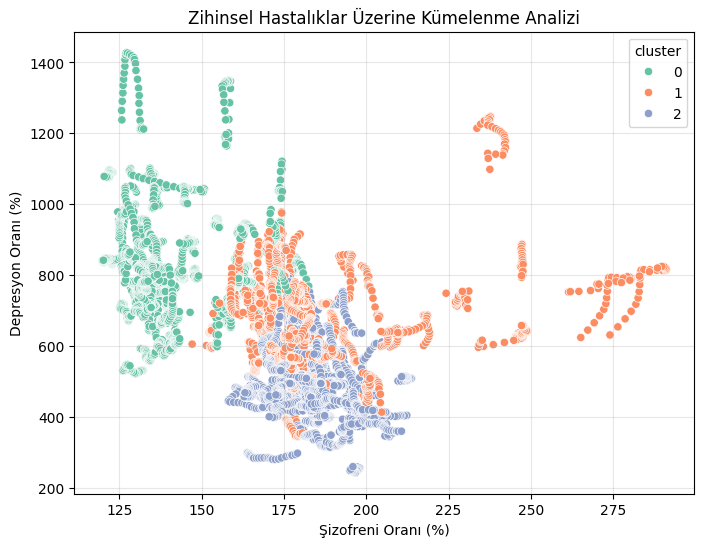

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# İlgili sütunları seç ve ölçekle
features = data2[[
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_schizophrenia",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_bipolar_disorder",
    "dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders"
]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Kümeleri belirle
kmeans = KMeans(n_clusters=3, random_state=42)
data2["cluster"] = kmeans.fit_predict(scaled_features)

# Kümeleri görselleştirme
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data2["dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_schizophrenia"],
    y=data2["dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders"],
    hue=data2["cluster"],
    palette="Set2"
)
plt.title("Zihinsel Hastalıklar Üzerine Kümelenme Analizi")
plt.xlabel("Şizofreni Oranı (%)")
plt.ylabel("Depresyon Oranı (%)")
plt.grid(alpha=0.3)
plt.show()
